<a href="https://colab.research.google.com/github/AI-AVENGER-S/ML-Practices/blob/main/hse_vsosh_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа (10 баллов): Heart Disease — классификация

**Цель:** на реальном медицинском датасете сравнить несколько алгоритмов классификации и проанализировать их поведение.

**Задача:** предсказать наличие сердечного заболевания  
`target = 1` — заболевание есть  
`target = 0` — заболевания нет  

---

## 1) Первичный анализ данных (3 балла)

Используя стандартные инструменты (`pandas`, `matplotlib`, `seaborn`), проведите анализ данных и сделайте выводы.

### 1.1 Общая структура (1 балл)
- Опишите размер датасета  
- Определите типы признаков  
- Проверьте наличие пропусков  

Выводы: какие признаки числовые, есть ли категориальные, есть ли проблемы в данных?

---

### 1.2 Целевая переменная (1 балл)
- Посчитайте количество объектов каждого класса  
- Определите, есть ли дисбаланс  

Выводы: можно ли в этой задаче ориентироваться только на accuracy?

---

### 1.3 Анализ признаков (1 балл)
Выберите 2–3 признака и:
- постройте графики распределения  
- сравните их поведение для классов 0 и 1  

Сделайте вывод: есть ли признаки, которые визуально разделяют классы?

---

## 2) Подготовка данных (2 балла)

### 2.1 Разбиение (1 балл)
- Разбейте данные на train/test (`test_size=0.2`, `random_state=42`)  
- Используйте `stratify=y`  
- Кратко объясните, зачем тут может быть нужна стратификация

---

### 2.2 Подготовка признаков (1 балл)
- Если есть категориальные признаки — закодируйте их  
- Масштабируйте числовые признаки (`StandardScaler`)  

Объясните (2–3 строки), зачем масштабирование важно для некоторых моделей.

---

## 3) Обучение моделей и подбор гиперпараметров (4 балла)

Обучите три модели. Для каждой попробуйте подобрать **основные гиперпараметры** и сравните результаты.

### 3.1 Logistic Regression (1 балл)
Попробуйте разные значения:
- `C` (например: 0.01, 0.1, 1, 10)
- при желании — `class_weight`

Определите, какое значение даёт лучший результат.

---

### 3.2 kNN (1 балл)
Попробуйте разные значения:
- `n_neighbors` (например: 3, 5, 7, 11)

Проанализируйте, как меняются метрики при увеличении k.

---

### 3.3 Decision Tree (1 балл)
Попробуйте разные значения:
- `max_depth` (например: 3, 5, 7, None)
- при желании — `min_samples_leaf`

Посмотрите, как глубина влияет на качество.

---

### 3.4 Оценка качества (1 балл)
Для каждой лучшей версии модели на test посчитайте:
- `accuracy`  
- `precision`  
- `recall`  
- `f1`  

Сведите итоговые результаты в таблицу и кратко прокомментируйте различия.

---

## 4) Анализ результатов (1 балл)

Сделайте одну визуализацию:
- либо confusion matrix для лучшей модели  
- либо график сравнения метрик моделей  

Ответьте письменно (5–7 строк):
- Какая модель показала лучший результат?
- Где наблюдается конфликт между precision и recall?
- Почему нельзя смотреть только на accuracy?

---

## Бонус (+1 балл, максимум 10)

Попробуйте изменить баланс классов с помощью  
`class_weight="balanced"`  
Сравните precision / recall / f1 до и после.  Объясните, что изменилось и почему.

Если очень хотите - обучите и оцените кэтбуст.


In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="heart-disease", as_frame=True)


df = data.frame
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0


In [146]:
import shap
import pandas as pd
!pip install catboost


df.describe()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 7.4 MB/s eta 0:00:00


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df["target"].value_counts()

,count
target,
1.0,165
0.0,138


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

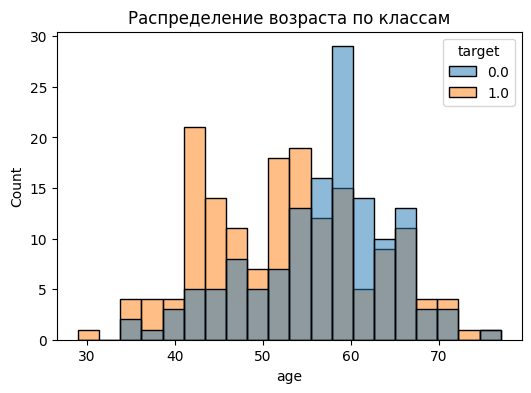

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.histplot(data=df, x="age", hue="target", bins=20)
plt.title("Распределение возраста по классам")
plt.show()

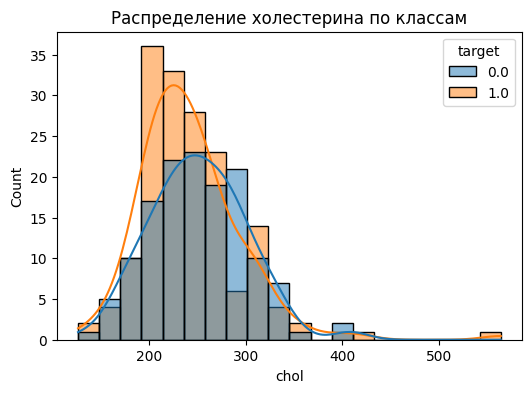

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="chol", hue="target", kde=True, bins=20)
plt.title("Распределение холестерина по классам")
plt.show()

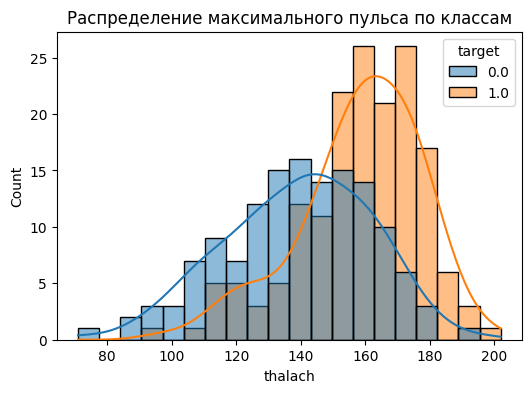

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="thalach", hue="target", kde=True, bins=20)
plt.title("Распределение максимального пульса по классам")
plt.show()

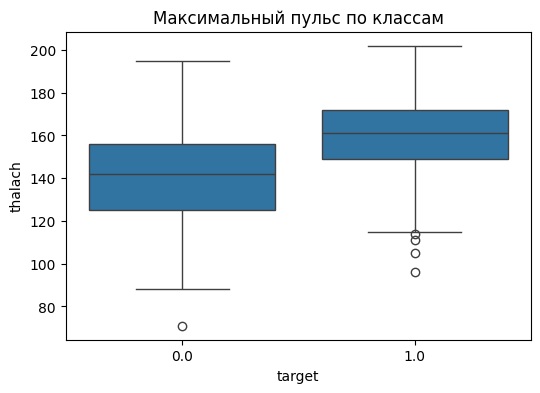

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="target", y="thalach")
plt.title("Максимальный пульс по классам")
plt.show()

In [34]:
X = df.drop("target", axis=1)
y = df["target"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
onehot_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("onehot", OneHotEncoder(handle_unknown='ignore'), onehot_features),
    ]
)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, fbeta_score


def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'f2': fbeta_score(y_test, y_pred, beta=2),
    }

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(solver="liblinear"))
])

In [129]:
param_grid_reg = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
}

In [130]:
grid_reg = GridSearchCV(
    pipe,
    param_grid_reg,
    cv=5,
    scoring=make_scorer(fbeta_score, beta=2),
    n_jobs=-1
)

grid_reg.fit(X_train, y_train)

best_reg = grid_reg.best_estimator_

print(grid_reg.best_params_)
print(grid_reg.best_score_)

{'model__C': 0.1, 'model__penalty': 'l1'}
0.8851794585942401


In [131]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 11]
}

grid_knn = GridSearchCV(
    pipe_knn,
    param_grid_knn,
    cv=5,
    scoring=make_scorer(fbeta_score, beta=2),
)

grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'model__n_neighbors': 7}
0.8537144323003135


In [132]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

param_grid_dt = {
    'model__max_depth': [3, 5, 7, None]
}

grid_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    cv=5,
    scoring=make_scorer(fbeta_score, beta=2),
)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'model__max_depth': 3}
0.8013705501474183


In [133]:
final_results = pd.DataFrame({
    'LogReg': get_metrics(best_reg, X_test, y_test),
    'kNN': get_metrics(best_knn, X_test, y_test),
    'DecisionTree': get_metrics(best_dt, X_test, y_test)
}).T

final_results

,accuracy,precision,recall,f1,f2
LogReg,0.819672,0.775000,0.939394,0.849315,0.901163
kNN,0.786885,0.750000,0.909091,0.821918,0.872093
DecisionTree,0.737705,0.717949,0.848485,0.777778,0.818713


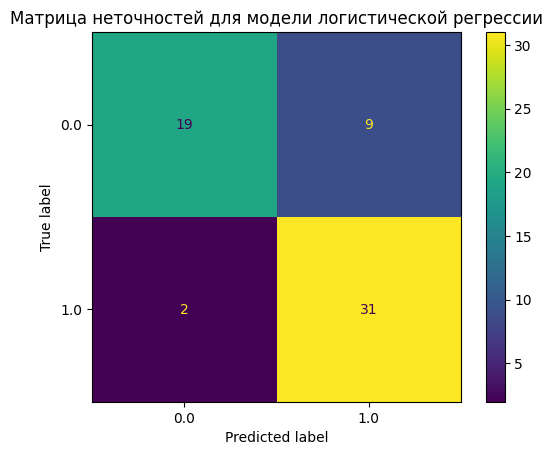

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_reg, X_test, y_test)
plt.title("Матрица неточностей для модели логистической регрессии")
plt.show()

In [143]:
pipe_weighted_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver="liblinear"))
])

param_grid_weighted_reg = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ["l1", "l2"],
    'model__class_weight': ["balanced", {0: 1, 1: 1.3}, {0: 1, 1: 1.5}, {0: 0.9, 1: 1.2}]
}

grid_weighted_reg = GridSearchCV(
    pipe_weighted_reg,
    param_grid_weighted_reg,
    cv=5,
    scoring=make_scorer(fbeta_score, beta=2),
)

grid_weighted_reg.fit(X_train, y_train)

best_weighted_reg = grid_weighted_reg.best_estimator_
print(grid_weighted_reg.best_params_)
print(grid_weighted_reg.best_score_)

{'model__C': 0.01, 'model__class_weight': {0: 1, 1: 1.5}, 'model__penalty': 'l2'}
0.9097113984288155


In [144]:
final_results = pd.DataFrame({
    'WeightedReg': get_metrics(best_weighted_reg, X_test, y_test),
    'LogReg': get_metrics(best_reg, X_test, y_test),
    'kNN': get_metrics(best_knn, X_test, y_test),
    'DecisionTree': get_metrics(best_dt, X_test, y_test)
}).T

final_results

,accuracy,precision,recall,f1,f2
WeightedReg,0.754098,0.704545,0.939394,0.805195,0.880682
LogReg,0.819672,0.775000,0.939394,0.849315,0.901163
kNN,0.786885,0.750000,0.909091,0.821918,0.872093
DecisionTree,0.737705,0.717949,0.848485,0.777778,0.818713


In [150]:
from catboost import CatBoostClassifier


pipe_cb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(
        verbose=0,
        random_state=42
    ))
])

param_grid_cb = {
    'model__depth': [2, 3, 4, 5],
    'model__learning_rate': [0.005, 0.01, 0.05, 0.1],
    'model__n_estimators': [10, 30, 40, 50, 70],
}

grid_cb = GridSearchCV(
    pipe_cb,
    param_grid_cb,
    cv=5,
    scoring=make_scorer(fbeta_score, beta=2),
)

grid_cb.fit(X_train, y_train)

best_cb = grid_cb.best_estimator_
print(grid_cb.best_params_)
print(grid_cb.best_score_)


{'model__depth': 3, 'model__learning_rate': 0.1, 'model__n_estimators': 50}
0.8884206517801967


In [152]:
final_results_with_cat = pd.DataFrame({
    'CatBoost': get_metrics(best_cb, X_test, y_test),
    'LogReg': get_metrics(best_reg, X_test, y_test),
}).T

final_results_with_cat

,accuracy,precision,recall,f1,f2
CatBoost,0.836066,0.794872,0.939394,0.861111,0.906433
LogReg,0.819672,0.775000,0.939394,0.849315,0.901163


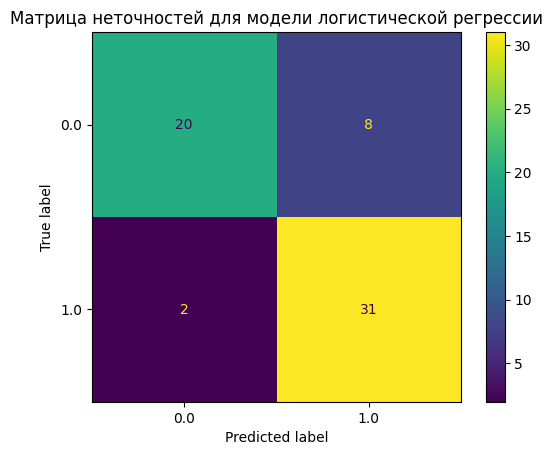

In [153]:
ConfusionMatrixDisplay.from_estimator(best_cb, X_test, y_test)
plt.title("Матрица неточностей для модели логистической регрессии")
plt.show()